# Remote Execution of workflows and external tasks

## Two methods for remote execution

Based on a host configuration system that defines ways to communicate with remote hosts, SoS allows you to execute complete or part of workflows on remote servers or task queues. Here we define

* A **host** as a local or remote machine that can be accessed with commands such as `scp`, `ssh`, and `rsync`.
* A **queue** as a task queue such as [PBS](http://www.pbspro.org/), [Torque](http://www.adaptivecomputing.com/products/open-source/torque/), [IBM LSF](https://www.ibm.com/support/knowledgecenter/en/SSETD4/product_welcome_platform_lsf.html), and [RQ](http://python-rq.org/) on a local or remote host that can queue and execute tasks. Direct execution of tasks on remote hosts is also considered a queue so any host can be used as a task queue.

There are two ways to execute workflows on a remote host,

* Use `sos run -r HOST` (or `%run -r` or `%sosrun -r` in Jupyter) to copy a script to remote host and execute the entire workflow remotely. All input and dependent files should be on remote host, and result files are not sychronized to local host.
* Use `sos run -q QUEUE` (or `%run -q` or `%sosrun -q` in Jupyter) to submit individual **tasks** of workflows to remote task queues. The workflow is still executed locally. Input, output, and dependent files of tasks will be synchronized to the remote host if necessary.

These two methods could be used in combination. That is to say, you use both options `-r HOST` and `-q QUEUE` to submit tasks to `QUEUE` from `HOST`.

### Remote execution of workflows

With proper host configurations, you can execute a workflow on a remote host using option `-r HOST`. For example,

INFO: Executing default_0: 
INFO: input:   []
null device 
          1 
INFO: output:   []
INFO: Workflow default (ID=f25d171f3e2aa278) is executed successfully.


> test.png (30.5 KiB):

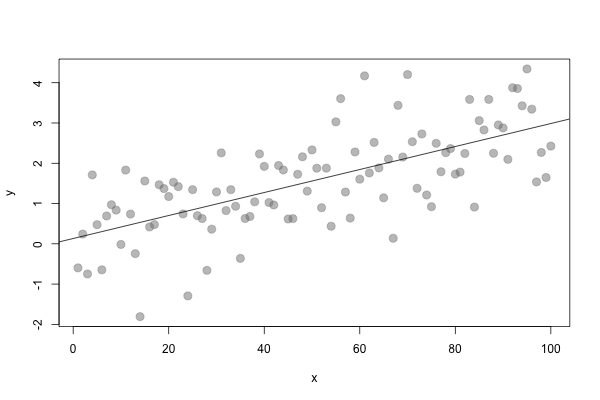

In [1]:
%preview -n test.png
%run -r dev
R:
  set.seed(1)
  x <- 1:100
  y <- 0.029*x + rnorm(100)
  png("test.png", height=400, width=600)
  plot(x, y, pch=19, col=rgb(0.5, 0.5, 0.5, 0.5), cex=1.5)
  abline(lm(y ~ x))
  dev.off()


executes a small R script (a SoS script with a single R action) on a remote host named `dev` (defined in `hosts.yml`). The script executes correctly (with output from `dev.off()` function) but because the workflow is executed remotely, `test.png` will be generated on `dev` and is unavailable for local preview. You can however preview the file with `-r` option of magic `%preview`:

%preview test.png -r dev

> test.png (11.2 KiB):

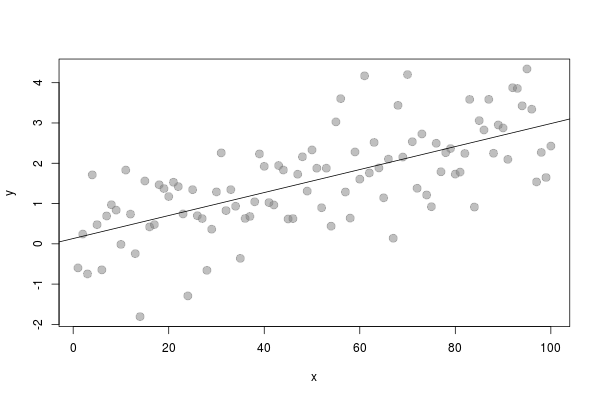

In [3]:
%preview -n test.png -r dev

The command line eqivalence of the commands, if the script is saved as `test.sos`, would be 
```
sos run test.sos -r dev
sos preview test.png -r dev
```

**Note:** when set via `-r` option to a remote batch system such as PBS/Torch, the default `localhost` on the remote machine will have to be configured to use the batch system.